In [11]:
import os
import sys

current_dir =  os.getcwd()
#parent_dir = os.path.dirname(current_dir)
#sys.path.insert(0, parent_dir)

grandparent_dir = os.path.dirname(os.path.dirname(current_dir))
sys.path.insert(0, grandparent_dir)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
gdp = pd.read_csv(f"{grandparent_dir}/data/raw/CAGDP1_2001_2021.csv", encoding='ISO-8859-1')


gdp = gdp.loc[:9533] #drop notes at the bottom


gdp['GeoFIPS'] = gdp['GeoFIPS'].fillna('').astype(str)
gdp['GeoFIPS'] = gdp['GeoFIPS'].str.strip(' "').astype(int)


#remove large regions
gdp = gdp[gdp['GeoFIPS'] % 10 != 0]

# focus on chain-type GDP
mask = gdp['Description'].str.startswith('Chain')
gdp = gdp[mask]


#drop Region number, Tablename, LineCode, IndustryClassification columns (the last one is empty anyway)
gdp = gdp.drop(gdp.columns[2:8], axis=1) 


gdp.replace('(NA)', np.nan, inplace=True)
gdp.replace('(NM)', np.nan, inplace=True)


nan_rows = gdp[gdp.isna().any(axis=1)]
#display(nan_rows)  # list of missing locations used in the data guide 

gdp.dropna(axis=0, inplace=True)

for column in gdp.columns[2:]:
    gdp[column] = gdp[column].astype(float)


assert gdp['GeoName'].is_unique

for column in gdp.columns[2:]:
    assert (gdp[column] > 0).all() 
    and (gdp[column].isna().sum() == 0) and (gdp[column].isnull().sum() == 0) and (gdp[column] < 1000).all()

AssertionError: 

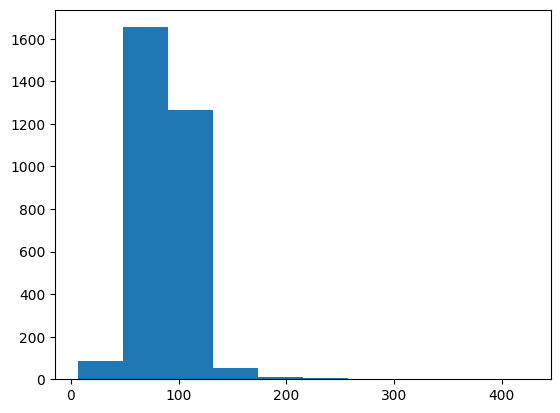

In [20]:
plt.hist(x = gdp['2002'])
plt.show()